# Highlighting data


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = 'https://assets.datacamp.com/production/repositories/3841/datasets/a6b11493e11dd47f3e03e0b96e2a2dbc51f03cb2/pollution_wide.csv'
pollution= pd.read_csv(url)
pollution.head()

,city,year,month,day,CO,NO2,O3,SO2
0,Cincinnati,2012,1,1,0.245,20.0,0.030,4.20
1,Cincinnati,2012,1,2,0.185,9.0,0.025,6.35
2,Cincinnati,2012,1,3,0.335,31.0,0.025,4.25
3,Cincinnati,2012,1,4,0.305,25.0,0.016,17.15
4,Cincinnati,2012,1,5,0.345,21.0,0.016,11.05


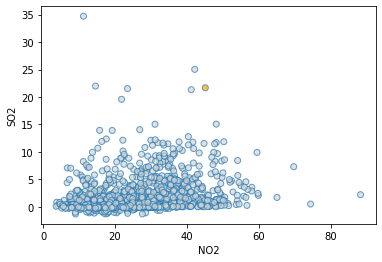

In [5]:
houston_pollution = pollution[pollution.city  ==  'Houston']

# Make array orangred for day 330 of year 2014, otherwise lightgray
houston_colors = ['orange' if (day  ==  330) & (year  ==  2014) else 'lightgray' 
                  for day,year in zip(houston_pollution.day, houston_pollution.year)]

sns.regplot(x = 'NO2',
            y = 'SO2',
            data = houston_pollution,
            fit_reg = False, 
            # Send scatterplot argument to color points 
            scatter_kws = {'facecolors': houston_colors, 'alpha': 0.7})
plt.show()

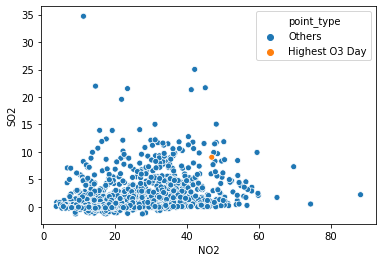

In [11]:
houston_pollution = pollution[pollution.city  ==  'Houston'].copy()

# Find the highest observed O3 value
max_O3 = houston_pollution.O3.max()

# Make a column that denotes which day had highest O3
houston_pollution['point_type'] = ['Highest O3 Day' if O3  ==  max_O3 else 'Others' for O3 in houston_pollution.O3]

# Encode the hue of the points with the O3 generated column
sns.scatterplot(x = 'NO2',
                y = 'SO2',
                hue = 'point_type',
                data = houston_pollution)
plt.show()

# Comparing groups


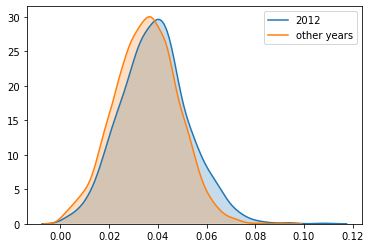

In [22]:
# Filter dataset to the year 2012
sns.kdeplot(pollution[pollution.year == 2012].O3, shade=True, label='2012')
# Filter dataset to everything except the year 2012
sns.kdeplot(pollution[pollution.year != 2012].O3, shade=True, label='other years')
#show plot
plt.show()

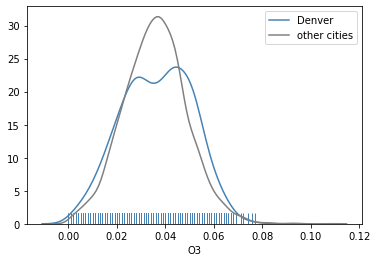

In [28]:
sns.distplot(pollution[pollution.city=='Denver'].O3, color='steelblue', hist=False, rug=True, label='Denver')
sns.distplot(pollution[pollution.city!= 'Denver'].O3, color='gray', hist=False, label='other cities')
plt.show()

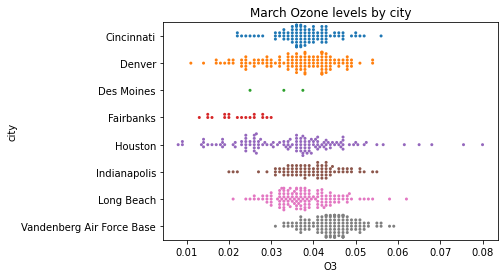

In [31]:
# Filter data to just March
pollution_march= pollution[pollution.month== 3]
# Plot beeswarm with x as O3
sns.swarmplot(x='O3', y='city', data=pollution_march, size=3)
plt.title('March Ozone levels by city')
plt.show()

# Annotations

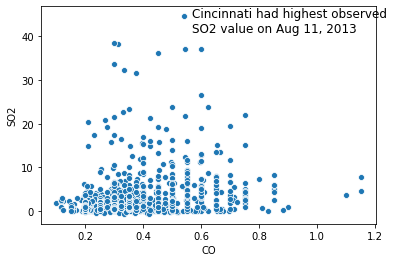

In [41]:
# Draw basic scatter plot of pollution data for August
sns.scatterplot(x='CO', y='SO2', data=pollution[pollution.month==8])
# Label highest SO2 value with text annotation
plt.text(0.57, 41, 'Cincinnati had highest observed\nSO2 value on Aug 11, 2013', fontdict={'ha':'left', 'size':'large'})
plt.show()

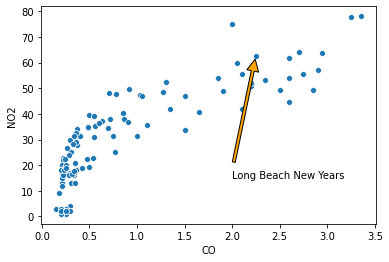

In [64]:
# Query and filter to New Years in Long Beach
jan_pollution = pollution.query("(month  ==  1) & (year  ==  2012)")
lb_newyears = jan_pollution.query("(day  ==  1) & (city  ==  'Long Beach')")

sns.scatterplot(x = 'CO', y = 'NO2',
                data = jan_pollution)

# Point arrow to lb_newyears & place text in lower left 
plt.annotate('Long Beach New Years',
             xy = (lb_newyears.CO, lb_newyears.NO2),
             xytext = (2, 15), 
             # Shrink the arrow to avoid occlusion
             arrowprops = {'facecolor':'orange', 'width': 3, 'shrink': 0.03},
              backgroundcolor = 'white')
plt.show()

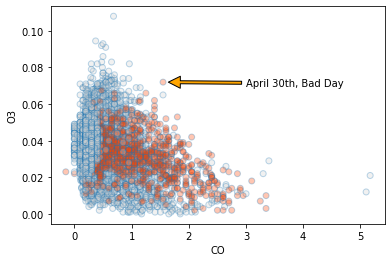

In [86]:
# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollution['city']]

# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x = 'CO',
            y = 'O3',
            data = pollution,
            fit_reg = False,
            scatter_kws = {'facecolors':is_lb, 'alpha': 0.3})

# Add annotation to plot
plt.annotate('April 30th, Bad Day', xy=(1.6, 0.072), xytext=(3,0.07), arrowprops={'facecolor':'orange', 'width':3, 'shrink':0.03})
plt.show() 

# Color in visualizations

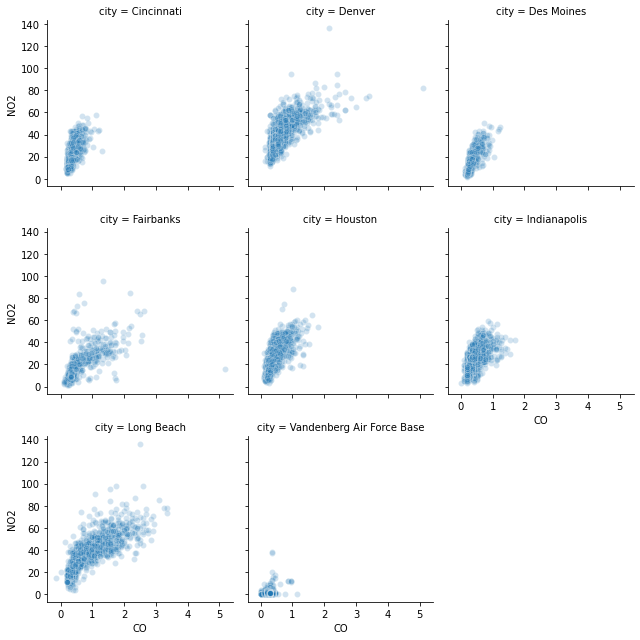

In [92]:
# Hard to read scatter of CO and NO2 w/ color mapped to city
# sns.scatterplot('CO', 'NO2',
#                 alpha = 0.2,
#                 hue = 'city',
#                 data = pollution)

# Setup a facet grid to separate the cities apart
g = sns.FacetGrid(data = pollution,
                  col = 'city',
                  col_wrap = 3)

# Map sns.scatterplot to create separate city scatter plots
g.map(sns.scatterplot, 'CO', 'NO2', alpha = 0.2)
plt.show()

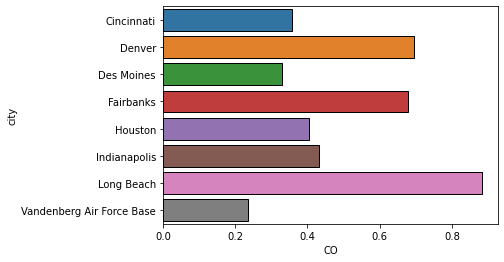

In [101]:
# adding a black border
import numpy as np

sns.barplot(y = 'city', x = 'CO', 
              estimator = np.mean,
            ci = False,
              data = pollution,
              # Add a border to the bars
            edgecolor = 'black')
plt.show()

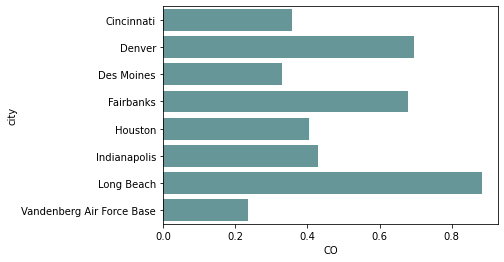

In [107]:
sns.barplot(y = 'city', x = 'CO', 
              estimator = np.mean,
            ci = False,
              data = pollution,
              # Replace border with bar colors
            color = 'cadetblue')
plt.show()
#ci is error bar 

# Continuous color palettes


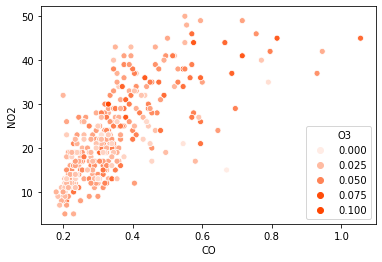

In [115]:
# Filter the data
cinci_2014 = pollution.query("city  ==  'Cincinnati' & year  ==  2014")
# Define a custom continuous color palette
color_palette= sns.light_palette('orangered', as_cmap=True)
#plot
sns.scatterplot(x='CO',y='NO2', hue='O3', data=cinci_2014, palette=color_palette)

In [162]:
import numpy as np
october= pollution.query("month == 10 & year ==2015")
october.CO.agg(np.mean)

0.5660810185185186

In [ ]:
# Define a custom palette
color_palette = sns.diverging_palette(250, 0, as_cmap = True)

# Pass palette to plot and set axis ranges
sns.heatmap(df.pop_est_2014,
            cmap = color_palette,
            center = 0,
            vmin = -4,
            vmax = 4)
plt.yticks(rotation = 0)
plt.show()

In [ ]:
# Dark plot background
plt.style.use("dark_background")

# Modify palette for dark background
color_palette = sns.diverging_palette(250, 0,
                                      center = 'dark',
                                      as_cmap = True)

# Pass palette to plot and set center
sns.heatmap(oct_2015_o3,
            cmap = color_palette,
            center = 0)
plt.yticks(rotation = 0)
plt.show()

# Categorical palettes


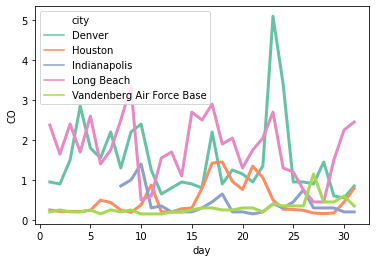

In [182]:
# Filter our data to Jan 2013
pollution_jan13 = pollution.query('year  ==  2013 & month  ==  1')
# Color lines by the city and use custom ColorBrewer palette
sns.lineplot(x = "day", 
             y = "CO", 
             palette = "Set2",
             hue = "city", 
             linewidth = 3,
             data = pollution_jan13)
plt.show()

In [184]:
# Choose the combos that get distinct colors, these locations we want different colors from the rest
wanted_combos = ['Vandenberg Air Force Base NO2', 'Long Beach CO', 'Cincinnati SO2']

# Assign a new column to DataFrame for isolating the desired combos
city_pol_month['color_cats'] = [x if x in wanted_combos else 'other' for x in city_pol_month['city_pol']]

# Plot lines with color driven by new column and lines driven by original categories
sns.lineplot(x = "month",
             y = "value",
             hue = 'color_cats',
             units = 'city_pol',
             estimator = None,
             palette = 'Set2',
             data = city_pol_month)
plt.show()

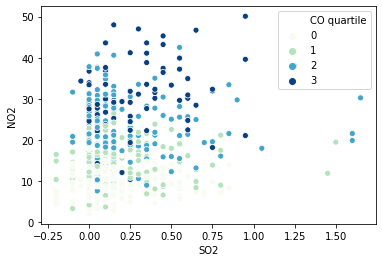

In [193]:
# Divide CO into quartiles. 
pollution['CO quartile'] = pd.qcut(pollution['CO'], q = 4, labels = False)

# Filter to just Des Moines
des_moines = pollution[pollution.city == 'Des Moines']

# Color points with by quartile and use ColorBrewer palette
sns.scatterplot(x = 'SO2',
                y = 'NO2',
                hue = 'CO quartile', 
                  data = des_moines,
                palette = 'GnBu')
plt.show()

In [ ]:
# Reduce to just cities in the western half of US
cities = ['Fairbanks', 'Long Beach', 'Vandenberg Air Force Base', 'Denver']

# Filter data to desired cities
city_maxes = max_pollutant_values[max_pollutant_values.city.isin(cities)]

# Swap city and year encodings
sns.catplot(x = 'city', hue = 'year',
              y = 'value', row = 'pollutant',    
              # Change palette to one appropriate for ordinal categories
              data = city_maxes, palette = 'BuGn',
              sharey = False, kind = 'bar')
plt.show()

# Point estimate inervals

In [200]:
data= {
        'pollutant':['CO', 'NO2', 'O3', 'SO2'],
        'mean' : [0.351911, 19.021429, 0.043982, 0.207143],
        'std_err': [0.033563, 2.200518, 0.001822, 0.037518],
        'y': ['95% Interval', '95% Interval', '95% Interval', '95% Interval'],
        'seen': [0.40, 16.00, 0.05, 0.15]
       
       
       }
average_ests= pd.DataFrame(data)

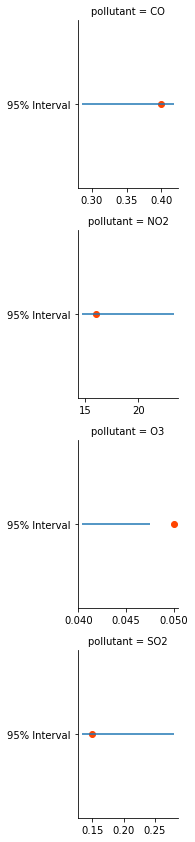

In [202]:
# Construct CI bounds for averages
average_ests['lower'] = average_ests['mean'] - 1.96*average_ests['std_err']
average_ests['upper'] = average_ests['mean'] + 1.96*average_ests['std_err']

# Setup a grid of plots, with non-shared x axes limits
g = sns.FacetGrid(average_ests, row = 'pollutant', sharex = False)

# Plot CI for average estimate
g.map(plt.hlines, 'y', 'lower', 'upper')

# Plot observed values for comparison and remove axes labels
g.map(plt.scatter, 'seen', 'y', color = 'orangered').set_ylabels('').set_xlabels('')

plt.show()

In [208]:
data1 = {
    'year': [2013,2014,2015],
    'mean':[ 0.840820, -1.337625 ,-0.649327  ],
    'std_err':[0.870135, 0.761541, 0.618175 ],
    'lower':[-0.864645, -2.830245, -1.860950],
    'upper':[2.546284, 0.154996, 0.562295]
}
diffs_by_year= pd.DataFrame(data1)

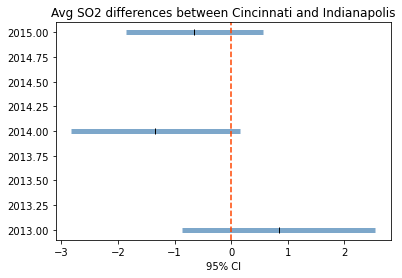

In [228]:
# Set start and ends according to intervals 
# Make intervals thicker
plt.hlines(y = 'year', xmin = 'lower', xmax = 'upper', 
           linewidth = 5, color = 'steelblue', alpha = 0.7,
           data = diffs_by_year)
# Point estimates. first is x, second argument is y, third arguement effects the line
plt.plot('mean', 'year', 'k|', data = diffs_by_year)

# Add a 'null' reference line at 0 and color orangered
plt.axvline(x = 0, color = 'orangered', linestyle = '--')

# Set descriptive axis labels and title
plt.xlabel('95% CI')
plt.title('Avg SO2 differences between Cincinnati and Indianapolis')
plt.show()

# Confidence bands


In [243]:
data12= {
         'day':[25,26,27,28,29],
         'mean':[2.56, 3.44,2.42434,1.44,2.40],
         'std_err':[0.452831, 0.35232, 0.4320, 0.223004, 0.2342342]
         }
vandenberg_NO2= pd.DataFrame(data12)

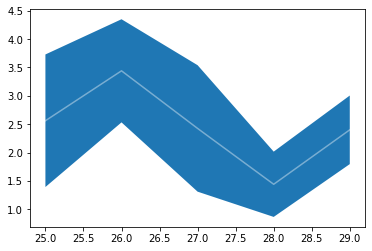

In [244]:
# Draw 99% inverval bands for average NO2. To get 99% you + the mean by 2.58 and * by std
vandenberg_NO2['lower'] = vandenberg_NO2['mean'] - 2.58*vandenberg_NO2['std_err']
vandenberg_NO2['upper'] = vandenberg_NO2['mean'] + 2.58*vandenberg_NO2['std_err']

# Plot mean estimate as a white semi-transparent line
plt.plot('day', 'mean', data = vandenberg_NO2,
         color = 'white', alpha = 0.4)

# Fill between the upper and lower confidence band values
plt.fill_between(x = 'day', 
                 y1 = 'lower', y2 = 'upper', 
                 data = vandenberg_NO2)

plt.show()

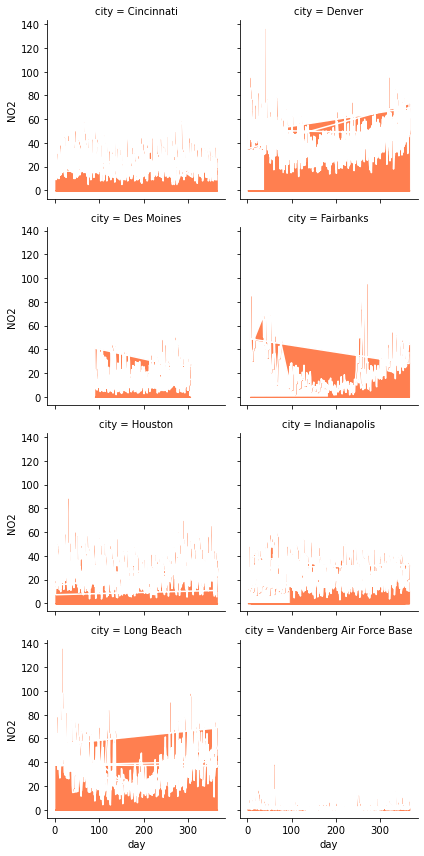

In [245]:
# Setup a grid of plots with columns divided by location
g = sns.FacetGrid(pollution, col = 'city', col_wrap = 2)

# Map interval plots to each cities data with corol colored ribbons
g.map(plt.fill_between, 'day', 'NO2', 'O3', color = 'coral')

# Map overlaid mean plots with white line
g.map(plt.plot, 'day', 'NO2', color = 'white')

plt.show()

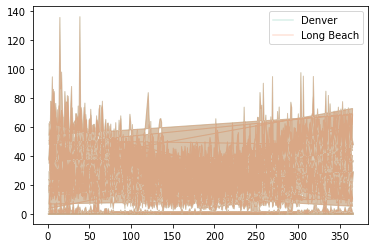

In [246]:
for city, color in [('Denver',"#66c2a5"), ('Long Beach', "#fc8d62")]:
    # Filter data to desired city
    city_data = pollution[pollution.city  ==  city]

    # Set city interval color to desired and lower opacity
    plt.fill_between(x = 'day', y1 = 'NO2', y2 = 'O3', data = pollution,
                     color = color, alpha = 0.4 )
    
    # Draw a faint mean line for reference and give a label for legend
    plt.plot('day','O3', data = pollution, label = city,
             color = color, alpha = 0.25)

plt.legend()
plt.show()

# Beyond 95%


In [ ]:
# Add interval percent widths
alphas = [     0.01,  0.05,   0.1] 
widths = [ '99% CI', '95%', '90%']
colors = ['#fee08b','#fc8d59','#d53e4f']

for alpha, color, width in zip(alphas, colors, widths):
    # Grab confidence interval
    conf_ints = pollution_model.conf_int(alpha)
    
    # Pass current interval color and legend label to plot
    plt.hlines(y = conf_ints.index, xmin = conf_ints[0], xmax = conf_ints[1],
               colors = color, label = width, linewidth = 10) 

# Draw point estimates
plt.plot(pollution_model.params, pollution_model.params.index, 'wo', label = 'Point Estimate')

plt.legend()
plt.show() 

In [ ]:
int_widths = ['90%', '99%']
z_scores = [1.67, 2.58]
colors = ['#fc8d59', '#fee08b']

for percent, Z, color in zip(int_widths, z_scores, colors):
    
    # Pass lower and upper confidence bounds and lower opacity
    plt.fill_between(
        x = cinci_13_no2.day, alpha = 0.4, color = color,
        y1 = cinci_13_no2['mean'] - Z*cinci_13_no2['std_err'],
        y2 = cinci_13_no2['mean'] + Z*cinci_13_no2['std_err'],
        label = percent)
    
plt.legend()
plt.show()

In [250]:
da= {
    'pollutant':['SO2', 'NO2', 'CO', 'O2'],
    'est':[0.138185,  0.320121, 0.084282, 0.565368],
    'std_err':[0.034651, 0.049849, 0.024758, 0.022191]
}
rocket_model = pd.DataFrame(da)
rocket_model

,pollutant,est,std_err
0,SO2,0.138185,0.034651
1,NO2,0.320121,0.049849
2,CO,0.084282,0.024758
3,O2,0.565368,0.022191


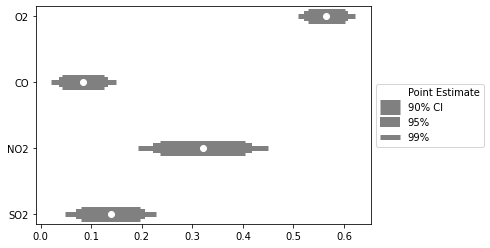

In [273]:
# Decrase interval thickness as interval widens
sizes =      [    15,  10,  5]
int_widths = ['90% CI', '95%', '99%']
z_scores =   [    1.67,  1.96,  2.58]

for percent, Z, size in zip(int_widths, z_scores, sizes):
    plt.hlines(y = rocket_model.pollutant, 
               xmin = rocket_model['est'] - Z*rocket_model['std_err'],
               xmax = rocket_model['est'] + Z*rocket_model['std_err'],
               label = percent, 
               # Resize lines and color them gray
               linewidth = size, 
               color = 'gray') 
    
# Add point estimate, # first argument x axis, 2nd y axis, 3 changed dot inside
plt.plot('est', 'pollutant', 'wo', data = rocket_model, label = 'Point Estimate')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

# Visualizing the bootstrap


In [276]:
def bootstrap(data, n_boots):
    return [np.mean(np.random.choice(data,len(data))) for _ in range(n_boots) ]


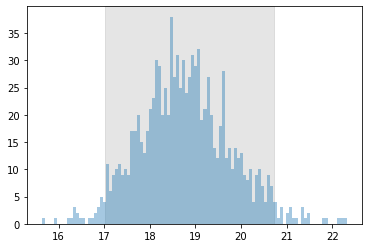

In [278]:
cinci_may_NO2 = pollution.query("city  ==  'Cincinnati' & month  ==  5").NO2

# Generate bootstrap samples
boot_means = bootstrap(cinci_may_NO2, 1000)

# Create a lower and upper 95%
lower, upper = np.percentile(boot_means, [2.5, 97.5])

# Plot shaded area for interval
plt.axvspan(lower, upper, color = 'gray', alpha = 0.2)

# Draw histogram of bootstrap samples
sns.distplot(boot_means, bins = 100, kde = False)

plt.show()

In [ ]:
sns.lmplot('NO2', 'SO2', data = no2_so2_boot,
           # Tell seaborn to a regression line for each sample
           hue = 'sample', 
           # Make lines blue and transparent
           line_kws = {'color': 'steelblue', 'alpha': 0.2},
           # Disable built-in confidence intervals
           ci = None, legend = False, scatter = False)

# Draw scatter of all points
plt.scatter('NO2', 'SO2', data = no2_so2)

plt.show()

In [279]:
pollution_may= pollution[pollution.month== 5]

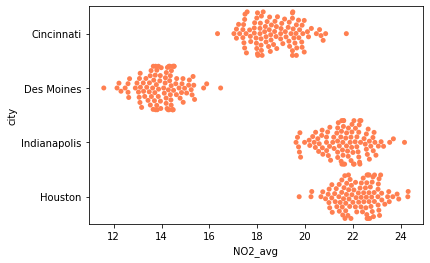

In [287]:
# Initialize a holder DataFrame for bootstrap results
city_boots= pd.DataFrame()
for city in ['Cincinnati', 'Des Moines', 'Indianapolis', 'Houston']:
    # Filter to city
    city_NO2 = pollution_may[pollution_may.city  ==  city].NO2
    # Bootstrap city data & put in DataFrame
    cur_boot = pd.DataFrame({'NO2_avg': bootstrap(city_NO2, 100), 'city': city})
    # Append to other city's bootstraps
    city_boots = pd.concat([city_boots,cur_boot])

# Beeswarm plot of averages with citys on y axis
sns.swarmplot(y = "city", x = "NO2_avg", data = city_boots, color = 'coral')

plt.show()

# First explorations

In [22]:
url1= 'https://assets.datacamp.com/production/repositories/3841/datasets/efdbc5d7c7b734f0b091d924605c4ad2664ef830/markets_cleaned.csv'
markets= pd.read_csv(url1)
markets.head()

,FMID,name,city,county,state,lat,lon,months_open,Bakedgoods,Beans,...,Plants,Poultry,Prepared,Seafood,Soap,Tofu,Trees,Vegetables,WildHarvested,Wine
0,1018261,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,-72.140337,44.411036,3.0,1,1,...,0,1,1,0,1,0,1,1,0,0
1,1018318,Stearns Homestead Farmers' Market,Parma,Cuyahoga,Ohio,-81.733939,41.374801,4.0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,1009364,106 S. Main Street Farmers Market,Six Mile,NaN,South Carolina,-82.818700,34.804200,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1010691,10th Steet Community Farmers Market,Lamar,Barton,Missouri,-94.274619,37.495628,8.0,1,0,...,1,1,1,0,1,0,0,1,0,0
4,1002454,112st Madison Avenue,New York,New York,New York,-73.949300,40.793900,5.0,1,0,...,0,0,1,0,1,0,0,1,0,0


In [23]:
# Print first three rows of data and transpose
first_rows = markets.head(3).transpose()
print(first_rows)

# Get descriptions of every column
col_descriptions = markets.describe(include = 'all',
                                percentiles = [0.5]).transpose()
print(col_descriptions)

                                                             0  \
FMID                                                   1018261   
name           Caledonia Farmers Market Association - Danville   
city                                                  Danville   
county                                               Caledonia   
state                                                  Vermont   
lat                                                   -72.1403   
lon                                                     44.411   
months_open                                                  3   
Bakedgoods                                                   1   
Beans                                                        1   
Cheese                                                       1   
Coffee                                                       1   
Crafts                                                       1   
Eggs                                                         1   
Flowers   

In [315]:
markets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8739 entries, 0 to 8738
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FMID           8739 non-null   int64  
 1   name           8739 non-null   object 
 2   city           8699 non-null   object 
 3   county         8228 non-null   object 
 4   state          8739 non-null   object 
 5   lat            8710 non-null   float64
 6   lon            8710 non-null   float64
 7   months_open    5452 non-null   float64
 8   Bakedgoods     8739 non-null   int64  
 9   Beans          8739 non-null   int64  
 10  Cheese         8739 non-null   int64  
 11  Coffee         8739 non-null   int64  
 12  Crafts         8739 non-null   int64  
 13  Eggs           8739 non-null   int64  
 14  Flowers        8739 non-null   int64  
 15  Fruits         8739 non-null   int64  
 16  Grains         8739 non-null   int64  
 17  Herbs          8739 non-null   int64  
 18  Honey   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83d1672160>,
      dtype=object)

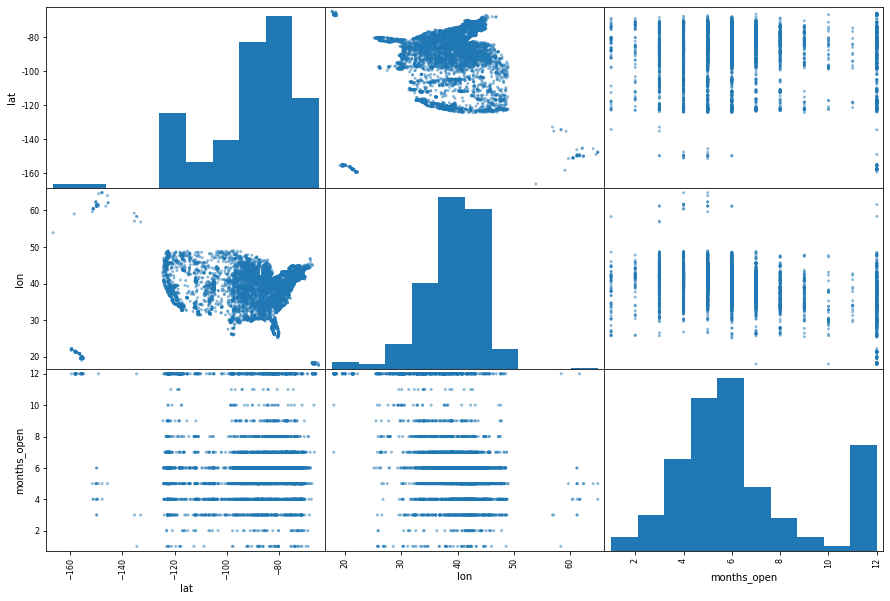

In [24]:
# Select just the numeric columns (exluding individual goods)
numeric_columns = ['lat', 'lon', 'months_open', 'city', 'county']
# Make a scatter matrix of numeric columns
pd.plotting.scatter_matrix(markets[numeric_columns], figsize=[15,10], alpha=0.5)

In [ ]:
 #Create a new logged population column 
markets['log_pop'] = np.log(markets['state_pop'])

# Draw a scatterplot of log-population to # of items sold
sns.scatterplot(x = 'log_pop', 
                  y = 'num_items_sold', 
                  # Reduce point opacity to show overlap
                  alpha = .25, 
                  data = markets)

plt.show()

# Exploring the patterns

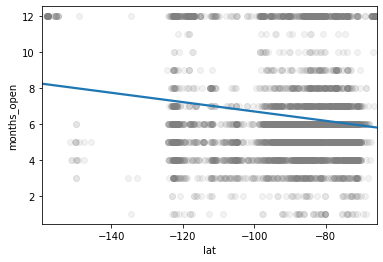

In [314]:
# Is latitude related to months open?
sns.regplot(x='lat', y='months_open', data=markets, scatter_kws={'color':'grey', 'alpha':0.10}, ci=False)
plt.show()

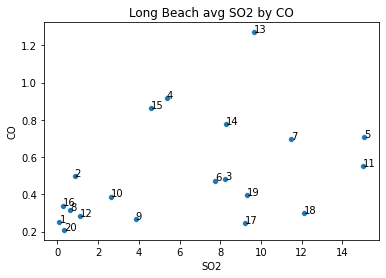

In [21]:
#HOW YOU CAN NAME CERTAIN PLOTS

g = sns.scatterplot("SO2","CO", data=houston_pollution1)

# Iterate over the rows of our data
for _, row in houston_pollution1.iterrows():
# Unpack columns from row. # _ the columns. Only include column name you want to use    
    
    _,_,_,day,CO,_,_,SO2= row
    # Draw annotation in correct place    
    g.annotate(day, (SO2,CO))
    plt.title('Long Beach avg SO2 by CO')


    

In [26]:
markets.head()

,FMID,name,city,county,state,lat,lon,months_open,Bakedgoods,Beans,...,Plants,Poultry,Prepared,Seafood,Soap,Tofu,Trees,Vegetables,WildHarvested,Wine
0,1018261,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,-72.140337,44.411036,3.0,1,1,...,0,1,1,0,1,0,1,1,0,0
1,1018318,Stearns Homestead Farmers' Market,Parma,Cuyahoga,Ohio,-81.733939,41.374801,4.0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,1009364,106 S. Main Street Farmers Market,Six Mile,NaN,South Carolina,-82.818700,34.804200,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1010691,10th Steet Community Farmers Market,Lamar,Barton,Missouri,-94.274619,37.495628,8.0,1,0,...,1,1,1,0,1,0,0,1,0,0
4,1002454,112st Madison Avenue,New York,New York,New York,-73.949300,40.793900,5.0,1,0,...,0,0,1,0,1,0,0,1,0,0


In [ ]:
#USED TO label every point on the plot. The to_ plot is what you want to plot

# Subset goods to interesting ones
to_plot = ['Cheese','Maple','Fruits','Grains','Seafood','Plants','Vegetables']
goods_by_state_small = goods_by_state.query("good in "+str(to_plot))

g = sns.scatterplot('good','prop_selling', data = goods_by_state_small,
                    # Hide scatter points by shrinking to nothing
                    s = 0)

for _,row in goods_by_state_small.iterrows():
  g.annotate(row['state'], (row['good'], row['prop_selling']), 
             # Center annotation on axis
             ha = 'center', 
             size = 10)

plt.show()

#  Marking your visualizations effienet

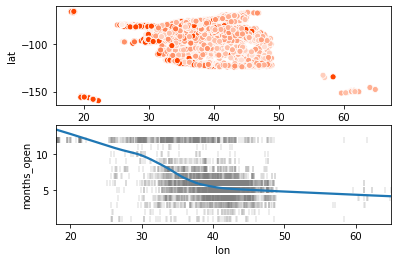

In [33]:
# Setup two stacked plots
f, (ax1, ax2)= plt.subplots(2,1)
# Draw location scatter plot on first plot
sns.scatterplot("lon", "lat", 'months_open', 
                palette = sns.light_palette("orangered",n_colors = 12), 
                legend = False, data = markets,
                ax = ax1);
# Plot a regression plot on second plot
sns.regplot('lon', 'months_open',
            scatter_kws = {'alpha': 0.2, 'color': 'gray', 'marker': '|'},
            lowess = True,
            marker = '|', data = markets, 
            ax = ax2)

plt.show()

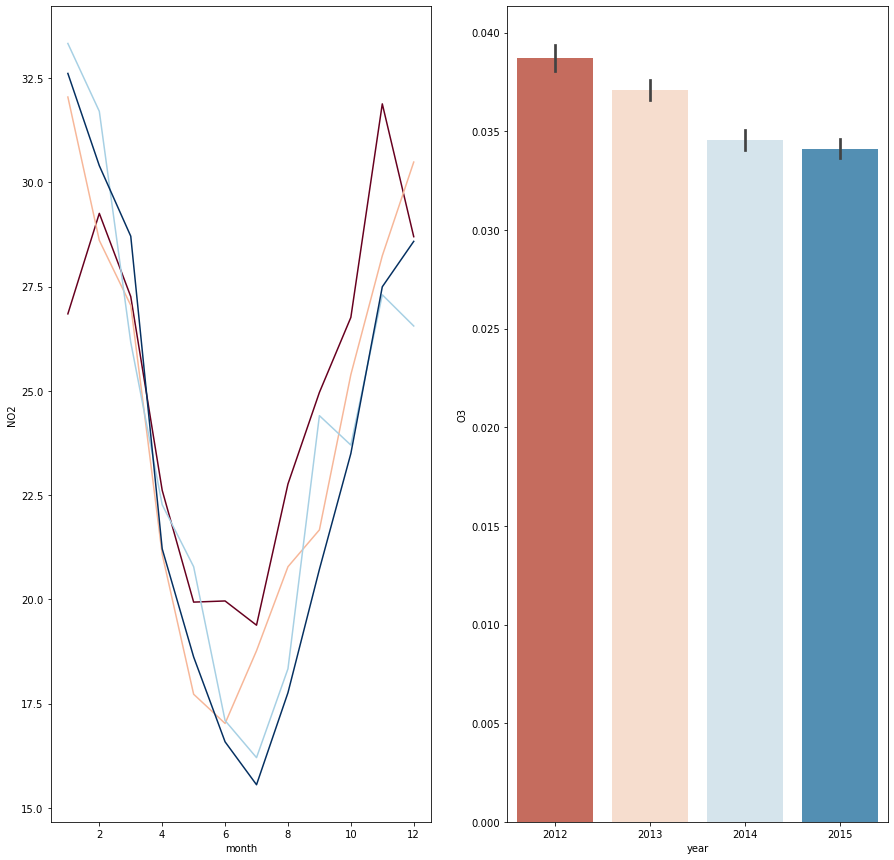

In [39]:
# Set up two side-by-side plots
f, (ax1, ax2)= plt.subplots(1, 2, figsize=(15,15))

sns.lineplot(x='month', y='NO2', data=pollution, hue='year', ax=ax1, palette='RdBu', ci=None)
sns.barplot(x='year', y='O3', data=pollution, dodge=False, hue='year', ax=ax2, palette='RdBu')

# Remove legends for both plots
ax1.legend_.remove()
ax2.legend_.remove()


# Tweaking your plot

In [ ]:
# Set background to white with grid
sns.set_style('whitegrid')

plt.scatter('good','prop selling', marker = '_', alpha = 0.7, data = goods_by_state)

# Draw lines across goods for highlighted states
highlighted = goods_by_state.query("state in ['New Mexico','North Dakota','Vermont']")
sns.lineplot('good','prop selling', 'state', data = highlighted, legend = False)

# Draw state name at end of lines
last_rows = highlighted.groupby('state', as_index = False).agg('first')
for _,row in last_rows.iterrows():
    plt.annotate(row['state'], (row['good'], row['prop selling']),
                 ha = 'right', xytext = (5,0), textcoords = 'offset pixels')

# Remove all borders
sns.despine(bottom = True, left = True)
plt.show()

In [ ]:
# Decrease font size so state names are less crowded
sns.set(font_scale = 0.85)

# Switch to an appropriate color palette
blue_pal = sns.light_palette("steelblue", as_cmap = True)

# Order states by latitude
g = sns.heatmap(markets_by_month.reindex(state_by_lat), 
            # Add gaps between cells
            linewidths = 0.1, 
            # Set new palette and remove color bar 
            cmap = blue_pal, cbar = False,
            yticklabels = True)

# Rotate y-axis ticks 
g.set_yticklabels(g.get_yticklabels(), rotation = 0)
plt.title('Distribution of months open for farmers markets by latitude')
plt.show()

In [53]:
# Draw barplot w/ colors mapped to state_colors vector
sns.barplot('people_per_market', 'state', palette = state_colors,
            data = markets_by_state, ax = ax1)

# Map state colors vector to the scatterplot as well
p = sns.scatterplot('population', 'num_markets', color = state_colors,
                    data = markets_by_state, s = 60, ax = ax2)

# Log the x and y scales of our scatter plot so it's easier to read
ax2.set(xscale = "log", yscale = 'log')

# Increase annotation text size for legibility
ax2.annotate(tx_message, xy = (26956958,230), 
             xytext = (26956958, 450),ha = 'right', 
             size = 15, backgroundcolor = 'white',
             arrowprops = {'facecolor':'black', 'width': 3})
sns.set_style('whitegrid')
plt.show()